In [1]:
import pandas as pd

In [2]:
filename = 'cassava dataset.xlsx'

df = pd.read_excel(filename)
df.rename(columns={'total leaf length (cm)': 'leaf_length', 'stem diameter (cm)': 'stem_diameter', 'Yield (kg)': 'yield'}, inplace=True)

In [3]:
df = df.drop('ID', axis=1)
df.head()

,leaf_length,stem_diameter,yield
0,155.30,2.12,0.116
1,763.11,2.11,0.941
2,766.16,2.01,0.927
3,782.46,2.11,0.952
4,2246.10,2.01,0.208


In [4]:
df.shape

(130, 3)

In [5]:
corr = df.corr()
corr.style.background_gradient(cmap='BrBG')

,leaf_length,stem_diameter,yield
leaf_length,1.000000,0.392374,0.529720
stem_diameter,0.392374,1.000000,0.759926
yield,0.529720,0.759926,1.000000


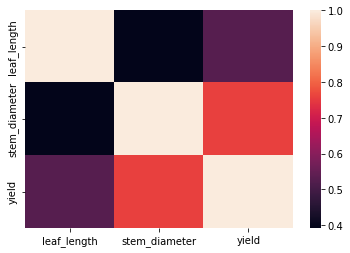

In [6]:
import seaborn as sns 

sns.heatmap(df.corr())

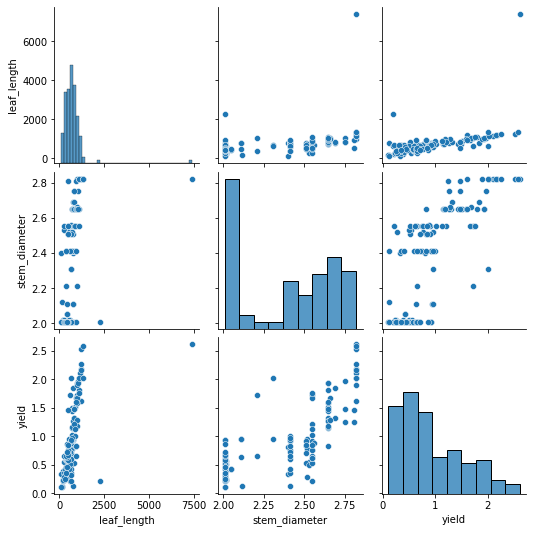

In [7]:

sns.pairplot(df)

(array([4., 6., 7., 8., 4., 4., 7., 8., 9., 4., 4., 7., 5., 7., 2., 0., 3.,
        2., 6., 2., 0., 4., 2., 2., 2., 3., 1., 2., 1., 3., 4., 1., 2., 0.,
        1., 0., 0., 0., 1., 2.]),
 array([0.111 , 0.1735, 0.236 , 0.2985, 0.361 , 0.4235, 0.486 , 0.5485,
        0.611 , 0.6735, 0.736 , 0.7985, 0.861 , 0.9235, 0.986 , 1.0485,
        1.111 , 1.1735, 1.236 , 1.2985, 1.361 , 1.4235, 1.486 , 1.5485,
        1.611 , 1.6735, 1.736 , 1.7985, 1.861 , 1.9235, 1.986 , 2.0485,
        2.111 , 2.1735, 2.236 , 2.2985, 2.361 , 2.4235, 2.486 , 2.5485,
        2.611 ]),
 <a list of 40 Patch objects>)

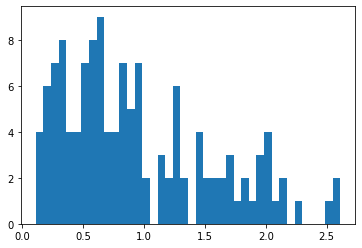

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['yield'], bins=40)

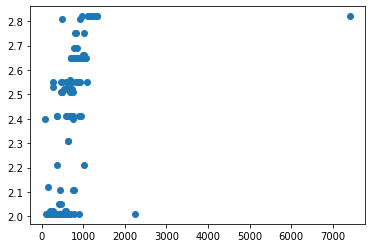

In [9]:
plt.scatter(df['leaf_length'], df['stem_diameter'])

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('yield', axis=1)
y = df['yield']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=11, test_size=0.2)



In [11]:
X_val.shape

(26, 2)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
model.score(X_val, y_val)

0.844061929431202

In [14]:

model.predict(X_val)

array([0.36592, 0.2829 , 1.4903 , 0.80178, 0.47331, 1.39068, 2.04585,
       0.77868, 0.79661, 2.00558, 0.79661, 0.71219, 0.6804 , 1.11591,
       1.30143, 1.74188, 0.25316, 1.31124, 0.88196, 0.25445, 0.6692 ,
       0.40865, 1.10071, 1.00696, 0.55214, 2.00914])

In [15]:
y_val.values

array([0.116, 0.331, 1.925, 0.927, 0.563, 1.311, 2.167, 0.841, 0.204,
       2.105, 0.505, 0.755, 0.317, 1.466, 1.837, 1.938, 0.232, 1.261,
       0.642, 0.353, 0.45 , 0.328, 0.714, 0.756, 0.856, 2.011])

In [16]:
x_val.values

NameError: ignored

In [17]:
dummy = X_val.copy()

dummy['correct_label'] = y_val

dummy['predicted_label'] = model.predict(X_val)

dummy

,leaf_length,stem_diameter,correct_label,predicted_label
0,155.30,2.12,0.116,0.36592
16,277.68,2.01,0.331,0.28290
49,974.50,2.65,1.925,1.49030
2,766.16,2.01,0.927,0.80178
9,550.00,2.02,0.563,0.47331
65,836.94,2.65,1.311,1.39068
115,1188.20,2.82,2.167,2.04585
129,491.00,2.51,0.841,0.77868
30,620.81,2.01,0.204,0.79661
107,1131.13,2.82,2.105,2.00558
